Importing Libraries

In [13]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import wave

Set the sound recording features

In [14]:
p = pyaudio.PyAudio()

chunk = 1024

stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=chunk)

Recording the sound

In [15]:
def sound_recording(sound_setup, chunk):
    for i in range(0,50):
        frames = []
        data2 = np.array([])
        a = sound_setup.read(chunk, False)
        frames.append(a)
        data = np.fromstring(a, dtype=np.int16)
        data2 = np.append(data2, data)

    stream.stop_stream()
    stream.close()
    p.terminate()

sound_recording(chunk, stream)

/var/folders/27/n62zk35s6nlfkhnp1kvqzm2c0000gn/T/ipykernel_4059/3239400018.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(a, dtype=np.int16)


Visualizing the recorded sound

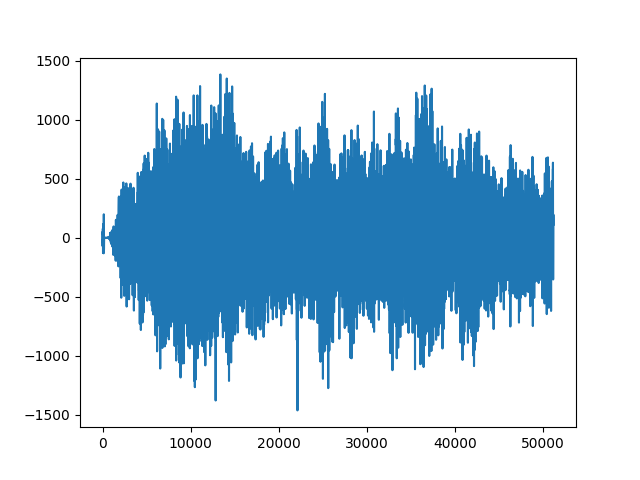

In [17]:
plt.close()
plt.plot(data2)
plt.show()

Calculating frequencies

In [18]:
tpCount = len(data2)

values = np.arange(int(tpCount/2))

timePeriod = tpCount/16000

frequencies = values/timePeriod

Using the Fourier series, we want to find out what hertz our sound is made of

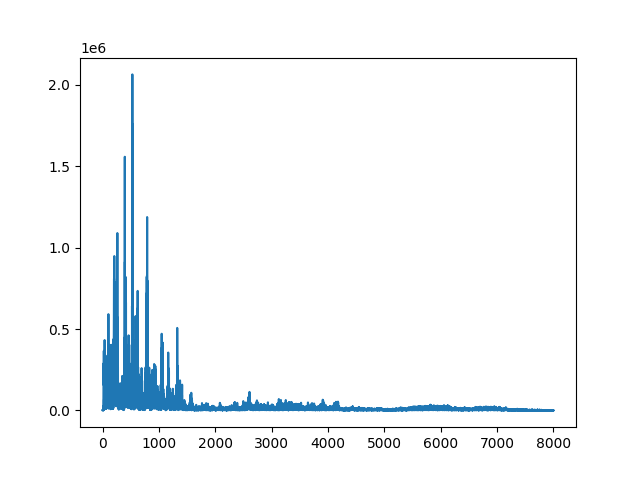

In [22]:
out_fft = np.fft.fft(data2)

# We want to halve this and only work with the right side, so we use the absolute value
out_fft = abs(out_fft[:25600])

plt.close()
plt.plot(frequencies, out_fft)
plt.show()

Using `specgram` to obtain the frequency spectrum of sound

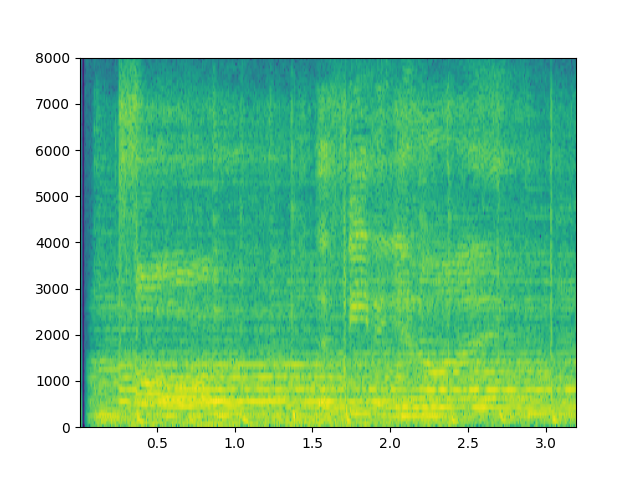

In [25]:
plt.close()
plt.specgram(data2, Fs=16000)
plt.show()